Проект популярного сервиса аренды самокатов GoFast. Сервис передал нам данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.  
Сервисом можно пользоваться:  

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;  

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy
import plotly.express as px
import scipy.stats as st
from math import factorial

pd.options.display.max_columns = 20

#### Шаг 1. Загрузка данных

##### Таблица с пользователями

In [2]:
try:
    users_data = pd.read_csv('/datasets/users_go.csv')
except:
    users_data = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
users_data.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


##### Таблица с поездками

In [4]:
try:
    trips_data = pd.read_csv('/datasets/rides_go.csv')
except:
    trips_data = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [5]:
trips_data.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
trips_data = trips_data.reset_index(drop=True)
pd.set_option('display.float_format', '{:.2f}'.format)
trips_data.head(5)

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


##### Таблица с подписками

In [7]:
try:
    subs_data = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subs_data = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [8]:
subs_data.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Общая информация по 3 таблицам

In [9]:
users_data.info()
print('---')
trips_data.info()
print('---')
subs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):


Построим распределение пользователей по годам

In [10]:
users_data_age = users_data['age'].value_counts(dropna=False)
#display(users_data_age)

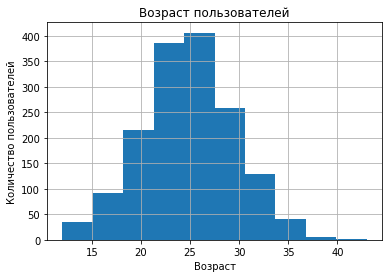

In [11]:
plt.hist(users_data['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [12]:
users_data['age'].min()

12

In [13]:
users_data['age'].max()

43

In [14]:
users_data['age'].mean()

24.922044728434503

Средний возраст пользователей 25 лет, минимальный возраст 12 лет а максимальный 43 года.

Построим распределение пользователей по городам

Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64

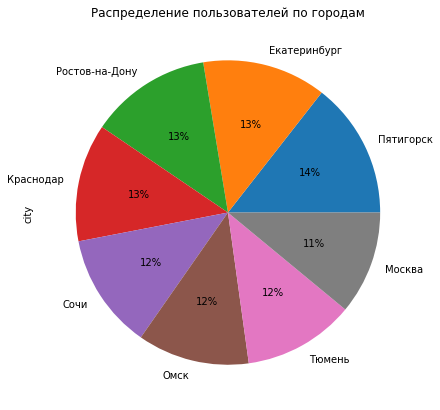

In [15]:
users_data_city = users_data['city'].value_counts(dropna=False)
display(users_data_city)
users_data['city'].value_counts().plot(
    kind = 'pie', 
    y = users_data_city,
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение пользователей по городам')
plt.show()

In [16]:
count_subs = users_data['subscription_type'].value_counts()
count_subs

free     846
ultra    719
Name: subscription_type, dtype: int64

In [17]:
#users_data['name'].unique()
#users_data['age'].unique()
#users_data['city'].unique()
#users_data['subscription_type'].unique()

In [18]:
#users_data['name'].value_counts(dropna=False)
#users_data['city'].value_counts(dropna=False)
#users_data['subscription_type'].value_counts(dropna=False)
#users_data['age'].value_counts(dropna=False)

Приведем столбец date к типу даты pandas.

In [19]:
trips_data['date'] = (
    pd.to_datetime(trips_data['date'],
                   format='%Y-%m-%dT%')
)
#trips_data.info()

In [20]:
#trips.duration.unique()
#trips.distance.unique()
#trips.date.unique()

Посмотрим на распределение в зависимости от подписки.

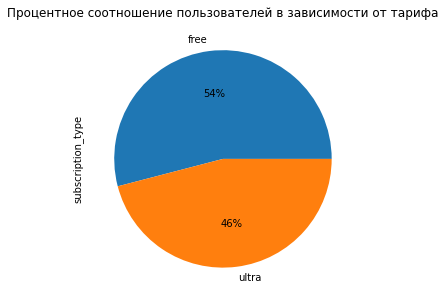

In [21]:
users_data['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_subs, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

In [22]:
users_data['subscription_type'].value_counts()

free     846
ultra    719
Name: subscription_type, dtype: int64

Пользователей без подписки больше на 8%.

##### Вывод.
- Средний возраст пользователей 25 лет, минимальный 12 а самому старшему 43 года.
- Пользователи равномерно распредлены по всем городам, но чуть больше в Пятигорске а меньше всего в Москве.
- Пользователей без подписки на 8% больше чем с подпиской.

#### Шаг 2. Предобработка данных

Создадим новый столбец с номером месяца, но сначала проверим за какой период наши данные, чтоб не получилось что месяц один и тот же а года разные.

In [23]:
trips_data['date'].dt.year.unique()

array([2021])

Данные представленны только за один год.

In [24]:
trips_data['month'] = pd.DatetimeIndex(trips_data['date']).month
display(trips_data)

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.10,19.82,2021-11-04,11
18064,1534,2840.42,21.41,2021-11-16,11
18065,1534,3826.19,18.44,2021-11-18,11
18066,1534,2902.31,16.67,2021-11-27,11


Посчитаем сколько пропущенных значений и дубликатов в таблице users_data.

In [25]:
for col in users_data.columns:
    print(f'{col}: {users_data[col].isna().sum() / users_data.shape[0] * 100:.2f}%')
# посчитал процент отсутствующих значений по каждой колонке.

user_id: 0.00%
name: 0.00%
age: 0.00%
city: 0.00%
subscription_type: 0.00%


In [26]:
users_data.duplicated().sum()

31

Посчитаем сколько пропущенных значений и дубликатов в таблице trips_data.

In [27]:
for col in trips_data.columns:
    print(f'{col}: {trips_data[col].isna().sum() / trips_data.shape[0] * 100:.2f}%')
# посчитал процент отсутствующих значений по каждой колонке.

user_id: 0.00%
distance: 0.00%
duration: 0.00%
date: 0.00%
month: 0.00%


In [28]:
trips_data.duplicated().sum()

0

Посчитаем сколько пропущенных значений и дубликатов в таблице subs_data.

In [29]:
for col in subs_data.columns:
    print(f'{col}: {subs_data[col].isna().sum() / subs_data.shape[0] * 100:.2f}%')
# посчитал процент отсутствующих значений по каждой колонке.

subscription_type: 0.00%
minute_price: 0.00%
start_ride_price: 0.00%
subscription_fee: 0.00%


In [30]:
subs_data.duplicated().sum()

0

Пропущенных значений нет ни в одной таблице, но 31 дубликат в таблице users_data.

In [31]:
duplicated_rows = users_data[users_data.duplicated()]
#duplicated_rows

In [32]:
duplicated_rows.shape

(31, 5)

Выявил 31 дубликат в татлице users_data. Во всех колонках этой таблицы значения могут повторяться, но не в колонке user_id, здесь должны быть только уникальные значения.  
Проверим столбец user_id.

In [33]:
duplicated_rows_id = users_data[users_data.duplicated(['user_id'])]
duplicated_rows_id

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [34]:
duplicated_rows_id.shape

(31, 5)

In [35]:
users_data.shape

(1565, 5)

Удалим все строки дубликаты.

In [36]:
users_data.drop_duplicates(inplace=True)

In [37]:
users_data.duplicated().sum()

0

In [38]:
users_data.shape

(1534, 5)

##### Вывод:

- Данные представленны только за 2021 год.
- В таблице users_data выявил 31 дубликат, одинаковые значения возможны во всех колонках этой таблицы, но не в колонке user_id, здесь должны быть уникальные номера, соответственно удалил дубликаты.
- Добавил столбец month.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов.

In [39]:
count_users_city = users_data['city'].value_counts()
count_users_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [40]:
count_users_city['rate'] = round(users_data['city'].value_counts() / count_users_city.sum(),2) * 100

In [41]:
count_users_city['rate']

Пятигорск        14.00
Екатеринбург     13.00
Ростов-на-Дону   13.00
Краснодар        13.00
Сочи             12.00
Омск             12.00
Тюмень           12.00
Москва           11.00
Name: city, dtype: float64

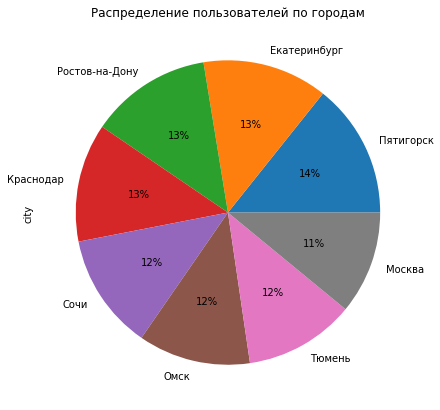

In [42]:
users_data['city'].value_counts().plot(
    kind = 'pie', 
    y = count_users_city,
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение пользователей по городам');

##### Соотношение пользователей с подпиской и без нее.

In [43]:
users_data['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

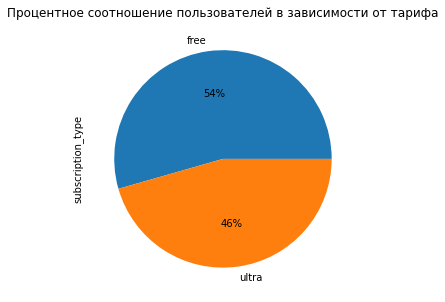

In [44]:
users_data['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = users_data, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

##### Возраст пользователей.

Самые возрастные пользователи.

In [45]:
users_data['age'].sort_values(ascending=False).head(10)

1201    43
961     39
804     38
453     38
383     38
205     37
848     37
721     36
1491    36
644     36
Name: age, dtype: int64

Самые младшие пользователи.

In [46]:
users_data['age'].sort_values().head(10)

664     12
66      12
727     12
34      12
235     13
1249    13
314     13
83      13
553     13
1241    13
Name: age, dtype: int64

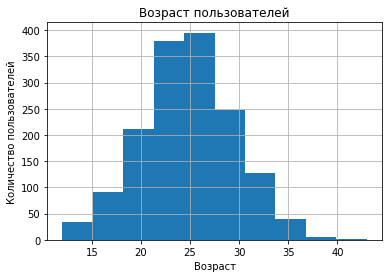

In [47]:
plt.hist(users_data['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [48]:
users_data['age'].mean()

24.903520208604956

Пользователи распределились в виде нормального распределения, средний возраст пользователей 25 лет.

##### Расстояние, которое пользователь преодолел за одну поездку.

In [49]:
round(trips_data['distance'].sort_values(), 2).head(10)

11555    0.86
9541     2.57
13690    4.33
8658     6.78
7841     7.10
8906    11.28
8324    12.23
13940   15.00
15626   15.37
11862   15.63
Name: distance, dtype: float64

Минимальное расстояние которое пользователь приодолел за одну поездку 0.86км.

In [50]:
round(trips_data['distance'].sort_values(ascending=False), 2).head(10)

16309   7211.01
16484   7066.00
15580   6908.49
17171   6760.94
17242   6724.93
10341   6671.97
11385   6601.20
12086   6538.94
10915   6535.39
11319   6503.60
Name: distance, dtype: float64

Максимальное расстояние которое пользователь приодолел за одну поездку 7211.

In [51]:
round(trips_data['distance'].mean(),2)

3070.66

Среднее расстояние которое проезжает пользователь 3070.

In [52]:
#round(trips_data['distance'].median(),2)

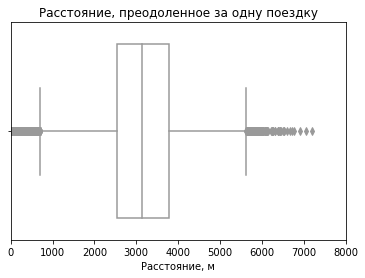

In [53]:
sns.boxplot(x=trips_data['distance'], color='white')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 8000)

#####  Продолжительность поездок.

In [54]:
trips_data

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.10,19.82,2021-11-04,11
18064,1534,2840.42,21.41,2021-11-16,11
18065,1534,3826.19,18.44,2021-11-18,11
18066,1534,2902.31,16.67,2021-11-27,11


In [55]:
trips_data['duration'].sort_values(ascending=False).head(10)

4215   40.82
4709   39.87
2623   39.53
1998   38.35
6453   38.27
143    38.13
3729   37.01
499    36.91
6348   36.81
4653   36.62
Name: duration, dtype: float64

Максимальное время поездки 40.82.

In [56]:
trips_data['duration'].sort_values()

12013    0.50
17314    0.50
15029    0.50
7437     0.50
12967    0.50
         ... 
6453    38.27
1998    38.35
2623    39.53
4709    39.87
4215    40.82
Name: duration, Length: 18068, dtype: float64

Минимальное время поездки 0.50.

In [57]:
trips_data.groupby(['user_id']).sum(numeric_only=True)

,distance,duration,month
user_id,,,
1,34070.18,204.60,99
2,33964.06,197.64,67
3,36907.60,233.19,66
4,44837.19,288.56,107
5,35556.95,174.07,51
...,...,...,...
1530,46758.47,292.37,104
1531,67054.79,408.19,142
1532,33902.20,212.16,111


In [58]:
trips_data.groupby(['user_id']).sum(numeric_only=True).max()

distance   79325.85
duration     446.23
month        176.00
dtype: float64

Суммарная самая большая продолжительность поездки одного пользователя равна 446.23 и пройденная дистанция 79325.85.

In [59]:
trips_data.groupby(['user_id']).sum(numeric_only=True).min()

distance   5530.34
duration     34.16
month         9.00
dtype: float64

Суммарная самая маленькая продолжительность поездки одного пользователя равна 34.16 и пройденная дистанция 5530.34

17.80501119798444

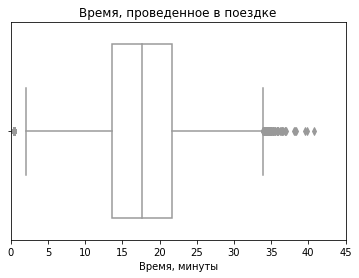

In [60]:
sns.boxplot(x = trips_data['duration'], color='white')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)
mean_trip = trips_data['duration'].mean()
mean_trip

Среднее время поездки составляет почти 18 минут.

- Количество пользователей по городам распределено примерно одинаково. С небольшим отрывом по количеству пользователей идет Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
- Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
- Самыми младшими являются пользователи 12 лет. Самыми старшими - 43 года.
- Самая короткая дистанция - 0.86 км Самая длинная - 7.2 км.
- В основном пользователи проезжают от 2.5 км до 4 км.
- Самые короткие поездки - по пол минуты. Выглядят крайне странно, возможно пользователи просто передумали пользоваться самокатом. Либо же техническая неинсправность самого самоката. Самая длинная поездка заняла 40 минут.
- В основном же длительность поездки состовляет 13 - 22 минут. А среднее время поездки 18 минут.

#### Шаг 4. Объединение данных

##### Объединим 3 таблицы

In [61]:
data = users_data.merge(trips_data, on = 'user_id', how='left')

In [62]:
data = data.merge(subs_data)
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,11,8,50,0


Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:  
- c данными о пользователях без подписки;  
- с данными о пользователях с подпиской.

##### Таблица с подписками

In [63]:
data_ultra = data.query('`subscription_type`== "ultra"')
#data_ultra

##### Таблица без подписок

In [64]:
data_free = data.query('`subscription_type`== "free"')
#data_free

##### Визуализация данных пройденного расстояния с подпиской и без 

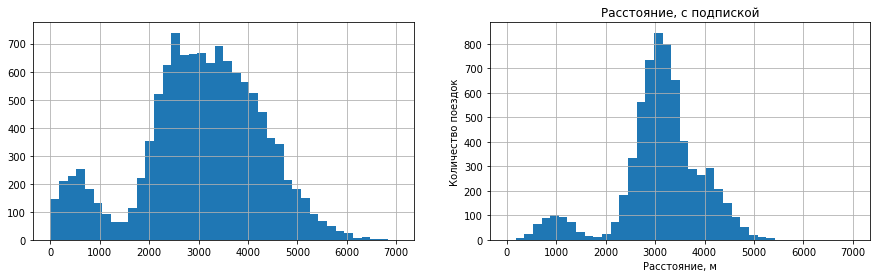

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data_free['distance'].hist(bins=40, range = (0, 7000), ax=axs[0])
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
data_ultra['distance'].hist(bins=40, range = (0, 7000), ax=axs[1])
plt.title('Расстояние, с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

Из графиков видно что пользователи без подписки проезжают большие расстояния.

##### Визуализация данных времнени поездок с подпиской и без 

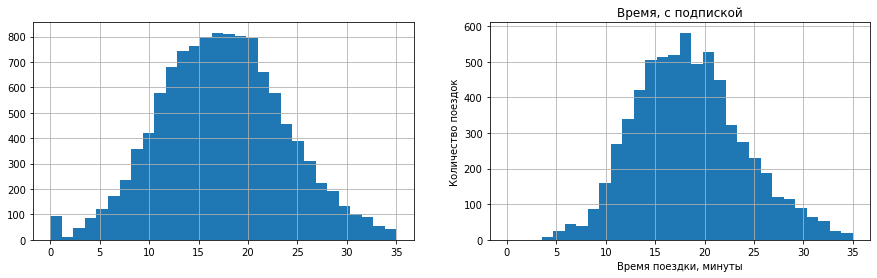

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data_free['duration'].hist(bins=30, range = (0, 35), ax=axs[0])
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
data_ultra['duration'].hist(bins=30, range = (0, 35), ax=axs[1])
plt.title('Время, с подпиской')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.show()

##### Вывод
Объединил данные о пользователях, поездках и тарифах в один датафрейм - data.

Выделил два датафрейма на основе data:

data_free - Информация о пользователях с бесплатным тарифом
data_ultra - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 10 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

##### Подсчёт выручки

In [67]:
# округлим значения до следующего целого числа.
data['duration'] = np.ceil(data['duration'])

In [68]:
# Создадим сводную талицу с объединенными данными.
agg_data = pd.pivot_table(data, index = ['month', 'user_id'],
                         values = ['distance', 'duration', 'name', 'subscription_type'],
                         aggfunc = {'distance' : sum,
                                   'duration' : sum,
                                   'name' : len,
                                   'subscription_type' : min})

In [69]:
agg_data.rename(columns = {'name' : 'count_use'}, inplace=True)

In [70]:
# выведем значения отсортированые по месяцу
agg_data.sort_values(by='month').head(10)

distance  duration  count_use subscription_type
month user_id                                                 
1     1         7027.51     42.00          2             ultra
      1061     12637.25     43.00          3              free
      1063      3276.36     10.00          1              free
      1064      5297.32     15.00          1              free
      1065     14547.10     99.00          4              free
      1066      2809.06     19.00          1              free
      1067      3864.90     22.00          1              free
      1069      7007.08     53.00          3              free
      1071      3635.09     15.00          1              free
      1072      2498.62     11.00          1              free

In [71]:
# Проверим все ли верно сработало, взглянув на user_id == 1
agg_data.query('user_id == 1')

,,distance,duration,count_use,subscription_type
month,user_id,,,,
1,1,7027.51,42.00,2,ultra
4,1,754.16,7.00,1,ultra
8,1,6723.47,46.00,2,ultra
10,1,5809.91,32.00,2,ultra
11,1,7003.50,56.00,3,ultra
12,1,6751.63,28.00,2,ultra


Из среза видно что, юзер с номером 1 ездил в январе, апреле, августе, октябре, ноябре и всегда был пользователем платной подписки. Продолжительность его поездок в среднем была от 14 до 22 минут. В среднем он проезжал около 6500м/месяц.

In [72]:
# создадим функцию которая подсчитает выручку помесячно.
def monthly_revenue(row):
    if row['subscription_type'] == 'ultra':
        return 199 + row['duration'] * 6
    elif row['subscription_type'] == 'free':
        return row['count_use'] * 50 + row['duration'] * 8
    else:
        'unknown_subscription'

In [73]:
agg_data['revenue_per_mnth'] = agg_data.apply(monthly_revenue, axis=1)

In [74]:
display(agg_data.head(5))

distance  duration  count_use subscription_type  \
month user_id                                                    
1     1         7027.51     42.00          2             ultra   
      3         3061.78     13.00          1             ultra   
      5         3914.65     13.00          1             ultra   
      7         6478.08     28.00          2             ultra   
      12        3577.15     33.00          1             ultra   

               revenue_per_mnth  
month user_id                    
1     1                  451.00  
      3                  277.00  
      5                  277.00  
      7                  367.00  
      12                 397.00

In [75]:
# Проверим все ли верно сработало, взглянув на user_id == 1
agg_data.query('user_id == 1')

,,distance,duration,count_use,subscription_type,revenue_per_mnth
month,user_id,,,,,
1,1,7027.51,42.00,2,ultra,451.00
4,1,754.16,7.00,1,ultra,241.00
8,1,6723.47,46.00,2,ultra,475.00
10,1,5809.91,32.00,2,ultra,391.00
11,1,7003.50,56.00,3,ultra,535.00
12,1,6751.63,28.00,2,ultra,367.00


###### Вывод
- Создал датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Нашел суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
- Добавил столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Шаг 6. Проверка гипотез

##### Проверим, тратят ли пользователи с подпиской больше времени на поездки.

Если да, то пользователи с подпиской могут быть «выгоднее» для компании.  
Проверим гипотезу:  
Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе. 
- H0: Время (duration) пользователей на подписке ultra = время (duration) пользователей без подписки.
- H1: Время (duration) пользователей на подписке ultra > время (duration) пользователей без подписки.  
alpha = 0.05

In [76]:
ultra = data_ultra['duration'] 

free = data_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


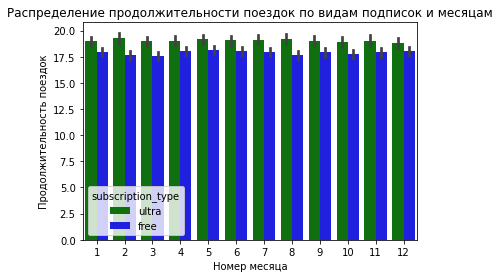

In [77]:
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = data,
            palette = ['green', 'blue'])
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

###### Вывод

Проведя исследование отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

##### Проверим гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 

- H 0: Расстояние (distance) пользователей на подписке ultra = 3130 метров
- H 1: Расстояние (distance) пользователей на подписке ultra < 3130 метров  
alpha = 0.05

In [78]:
distance_ultra = data_ultra['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(
    distance_ultra, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


###### Вывод
Не получилось отвергнуть гипотезу о том, что среднее расстояние поездок с использованием подписки 'ultra' (меньше или) равно 3130 метров.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

- H 0: Выручка (revenue_per_mnth) пользователей на подписке ultra = выручка (revenue_per_mnth) пользователей без подписки.
- H 1: Выручка (revenue_per_mnth) пользователей на подписке ultra > выручка (revenue_per_mnth) пользователей без подписки.  
alpha = 0.05

In [79]:
ultra_per_month = agg_data.loc[agg_data.subscription_type == 'ultra', 'revenue_per_mnth'] 

free_per_month = agg_data.loc[agg_data.subscription_type == 'free', 'revenue_per_mnth'] 


results = st.ttest_ind(ultra_per_month, 
                       free_per_month,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


###### Вывод
Проверив гипотезу, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку пользователей без подписки.

##### 

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Ответ:

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.
Гипотезы будут сформулированы так:

- H0 : μ1 = μ2
- H1 : μ1 != μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

#### Шаг 7. Распределения

##### Задача 1

Требуется выполнить план по продлению подписки 100 клиентами путем рассылки промокодов. Ранее вероятность продления была 10%. Требуется обеспечить выполнение плана с вероятностью неуспеха не более 5%. Построить график и ответить на вопрос. Сколько нужно разослать промокодов?

In [80]:
def cnsbe(n, p, x):
    # Расшифровка названия функции:
    # cnsbe - calculation of the number of successful Bernoulli experiments 
    # by approximating the binomial distribution by the normal
    # (расчет количества успешных экспериментов Бернулли 
    # путем аппроксимации биномиального распределения нормальным)
    
    # Параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    
    # x - вероятность расчитываемого значения
    
    # Расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # Расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # Расчет значения для заданной вероятности x
    result = distr.ppf(x)
    
    # Построение графика
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=result, color='red')
    plt.show()
    
    return result

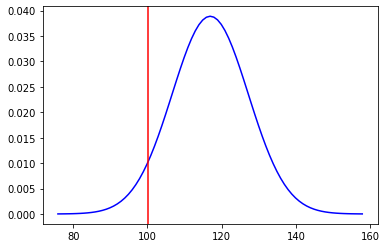

100.02841955223582

In [81]:
cnsbe(1169, .1, .05)

Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.

Альтернативное решение

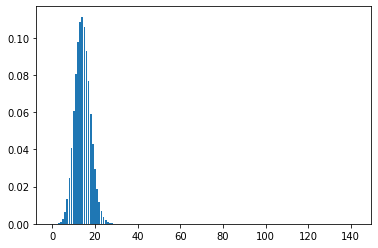

Требуется произвести 142 действия для получения 10 успешных результатов с вероятностью 95.0% при вероятности успеха 10.0%.


In [82]:
# Функция поиска количества всех попыток экспериментов Бернули n
# которые приводят к желаемому количеству успешных попыток kn
# с определенной вероятностью kp при вероятносте успеха p
def search_binom_n(kn, kp, p):
    # kn - требуемое количество успешных попыток
    # p  - известная вероятность успешных попыток
    # kp - с какой вероятностью нужно получить kn
    kp = 1 - kp
    
    # Общее количество попыток n должно быть не менее 
    # количества успешных попыток kn
    n = kn
    # Тригер успеха
    result = False
    
    # Повторять цикл, пока количество всех попыток n не станет достаточным 
    # для получения требуемого количества успешных попыток kn с вероятностью kp
    while result == False:
        # Вероятности
        distr = []
        # Значения
        k_nums = []
        
        # Построение биноминального распределения
        for k in range(0, n + 1):
            choose = factorial(n) / (factorial(k) * factorial(n - k))
            prob = choose * p**k * (1 - p)**(n - k)
            distr.append(prob)
            k_nums.append(k)
        
        # Проверка параметров распределения
        # на соответствие условиям
        p_sum = 0
        j = 0
        # Сложение вероятностей полученного биноминального распределения
        # до получения значения 
        for i in distr:
            p_sum += i
            j += 1
            # Если сумма сложенных вероятностей равна 
            # ожидаемой вероятности pk получения pn, 
            # то завершить цикл сложения
            if p_sum >= kp: break
        
        # Если значением k при вероятности kp меньше kn,
        # то увеличить n и продолжить расчеты
        if k_nums[j] < kn:
            n += 1
        # Если найдено такое n, которое дает результат kn 
        # с вероятностью kp, то завершить расчеты 
        else:
            result = True
            plt.bar(k_nums, distr);
            plt.show()
            break
    
    return n

k = 10
kp = .95
p = .1
print(f'Требуется произвести {search_binom_n(k, kp, p)} \
действия для получения {k} успешных результатов с вероятностью \
{kp*100}% при вероятности успеха {p*100}%.')

С помощью созданной функции получилось произвести расчеты для выполнения плана в 10 раз меньше. Для 10 продлений подписки с вероятностью 95%, требуется разослать 142 промокода, которые приводят к продлению подписки с вероятностью 10%. Исходя из полученного результата можно предположить, что при увеличении количества плановых продлений в 10 раз, также увеличится количество разосланных промокодов приблизительно в 10 раз. Если это так, то требуется разослать 1420 промокодов.

##### Задача 2

Планируется разослать клиентам 1 млн. уведомлений, которые клиенты открывают с вероятностью 40%. Требуется с помощью аппроксимации построить график распределения и оценить вероятность того, что не более 399.5 тыс. клиентов откроют уведомления.

In [83]:
# Функция расчета вероятности проведения успешных экспериментов Бернули
# путем аппроксимации биномиального распределения нормальным
def cpsbe(n, p, x):
    # Расшифровка названия функции:
    # cpsbe - calculation of the probability of successful Bernoulli experiments
    # by approximating the binomial distribution by the normal
    # (расчет вероятности проведения успешных экспериментов Бернули 
    # путем аппроксимации биномиального распределения нормальным)
    
    # Параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    
    # x - заданное значение, для которого расчитывается вероятность
    
    # Расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # Расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # Расчет вероятности для заданного значения x
    result = distr.cdf(x)
    
    # Построение графика
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=x, color='red')
    plt.show()
    
    return result

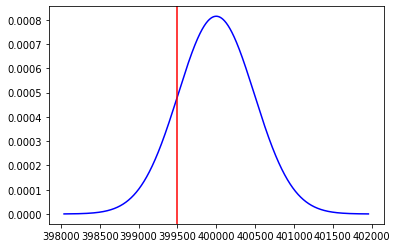

0.15371708296369768

In [84]:
cpsbe(1000000, .4, 399500)

399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.

#### Выводы проекта

Основная цель проекта достигнута. Проанализированы данные сервиса аренды самокатов GoFast и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти.

##### Описание исходных данных

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в три файла.

Пользователи — ‘users_go.csv’:

- ‘user_id’ — уникальный идентификатор пользователя;
- ‘name’ — имя пользователя;
- ‘age’ — возраст;
- ‘city’ — город;
- ‘subscription_type’ — тип подписки (free, ultra). 

Поездки — ‘rides_go.csv’:

- ‘user_id’ — уникальный идентификатор пользователя;
- ‘distance’ — расстояние, которое пользователь проехал в текущей сессии (в метрах);
- ‘duration’ — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
- ‘date’ — дата совершения поездки.  

Подписки — ‘subscriptions_go.csv’:

- ‘subscription_type’ — тип подписки;
- ‘minute_price’ — стоимость одной минуты поездки по данной подписке;
- ‘start_ride_price’ — стоимость начала поездки;
- ‘subscription_fee’ — стоимость ежемесячного платёж.

##### Выполненная работа

В ходе проекта были проделаны следующие шаги:

Загрузка данных.
Предобработка данных.  

- Добавление столбцов.
- Обработка дубликатов.
- Проверка результатов предобработки данных.  

Исследовательский анализ данных:  

- Частота встречаемости городов.
- Соотношение пользователей с подпиской и без нее.
- Возраст пользователей.
- Расстояние, которое пользователь преодолел за одну поездку.
- Продолжительность поездок.
- Сделаны промежуточные выводы исследовательского анализа.  

Объединение данных.  

- Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge().
- Создание двух датафреймов с пользователями, имеющими подписку и без нее, на основе общего датафрейма.
- Визуализация данных из датафреймов, разделенных на пользователей с подпиской и без.  

Подсчёт выручки.  

- Создание датафрейма, агрегированного по пользователям, на основе ‘data’
- Добавление столбца в агрегированный датафрейм с помесечной выручкой по каждому пользователю  

Проверка гипотез:  

- Тратят ли пользователи с подпиской больше времени на поездки?
- Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Помесчячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Сделать выводы.
- Каким тестом проверить гипотезу о снижении количества пользовательских обращений после обновления сервиса, с которым взаимодействует мобильное приложение?  

Распределения:  

- Задача №1.
- Задача №2.


##### Выводы

Все исходные данные во всех файлах не содержали пропусков, значительных выбросов, а также дубликатов, кроме тех, которые были обнаружены в файле ‘users_go.csv’. 

В ходе исследовательского анализа данных было выявлено:

- Пользователей с подпиской «free» всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
- Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
- Большая часть всех пользователей используют подписку «free». Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
- Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.
- За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
- Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается выброс размером менее 100 поездок с продолжительностью в 1 минуту.  

В результате группировки данных выявлено:

- Поездок с исползьзованием подписки ‘free’ на 5068 больше, чем с использованием подписки ‘ultra’, и составляет 11568.
- Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’.
- Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’. При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик ‘free’ в районе 700 метров, а основной 2500-3500 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.
- Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.
- Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской ‘free’ в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки ‘free’ нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.
- Во всех городах доминирует подписка ‘free’. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок). Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок).  

Не получилось отвергнуть ни одну из выдвинутых нулевых гипотез. Например, гипотезу о том, что средняя продолжительность поездок с подпиской ‘ultra’ равна (или больше) средней продолжительности с подпиской ‘free’. Или гипотезу о том, что среднее расстояние поездки с использованием подписки ‘ultra’ равно (или менее) 3130 метрам. Или гипотезу о том, что средняя выручка от поездок с использованием подписки ‘ultra’ равна (или больше) средней выручке с ипользованием подписки ‘free’.

В задачах на распределение подсчитано:

- Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.
- 399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.